**EDA: Netflix Movies and TV Shows. Part 2**

**Data source:** [https://www.kaggle.com/datasets/shivamb/netflix-shows/data](https://www.kaggle.com/datasets/shivamb/netflix-shows/data)

In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from collections import Counter
from nltk.corpus import stopwords
from wordcloud import WordCloud
import nltk
import re



In [2]:
# Load the dataset
df = pd.read_csv('netflix_clean_data.csv')

**4. Analysis and answering the questions**

**What is the distribution between movies and TV shows?**

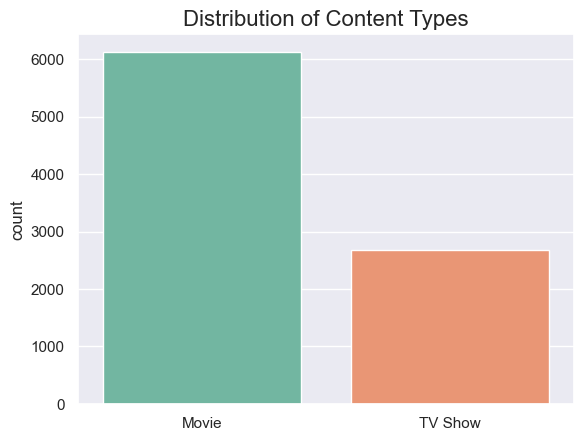

In [21]:
# Visualization of the distribution of content types
sns.set_theme(style='darkgrid')
sns.countplot(data=df, 
              x='type', 
              palette='Set2', 
              hue='type', 
              legend=False)
plt.title('Distribution of Content Types', fontsize=16)
plt.xlabel('')
plt.show()

**What are the most popular genres?**

In [4]:
# Split genres into individual values and find the top 10 genres overall
df['listed_in'] = df['listed_in'].str.split(', ')
all_genres = df['listed_in'].explode().value_counts().head(10)

# Top 5 genres for Movies
movies_genres = df[df['type'] == 'Movie']['listed_in'].explode().value_counts().head(5)
# Top 5 genres for TV Shows
tv_show_genres = df[df['type'] == 'TV Show']['listed_in'].explode().value_counts().head(5)

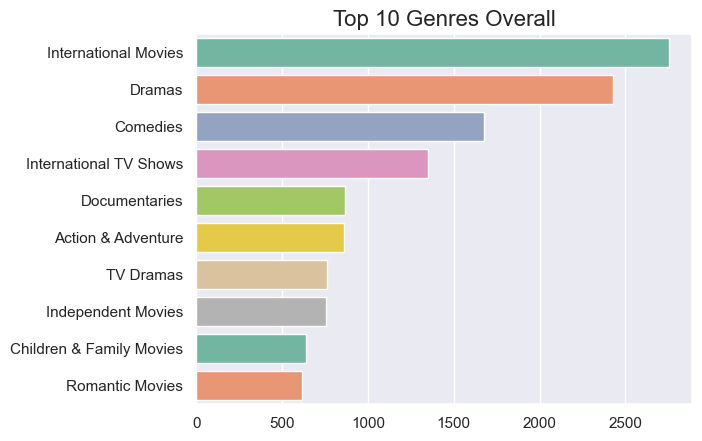

In [22]:
# Visualization of the top 10 genres overall
sns.set_theme(style='darkgrid')
sns.barplot(x=all_genres.values, 
            y=all_genres.index, 
            palette='Set2', 
            hue=all_genres.index)
plt.ylabel('')
plt.title('Top 10 Genres Overall', fontsize=16)
plt.show()

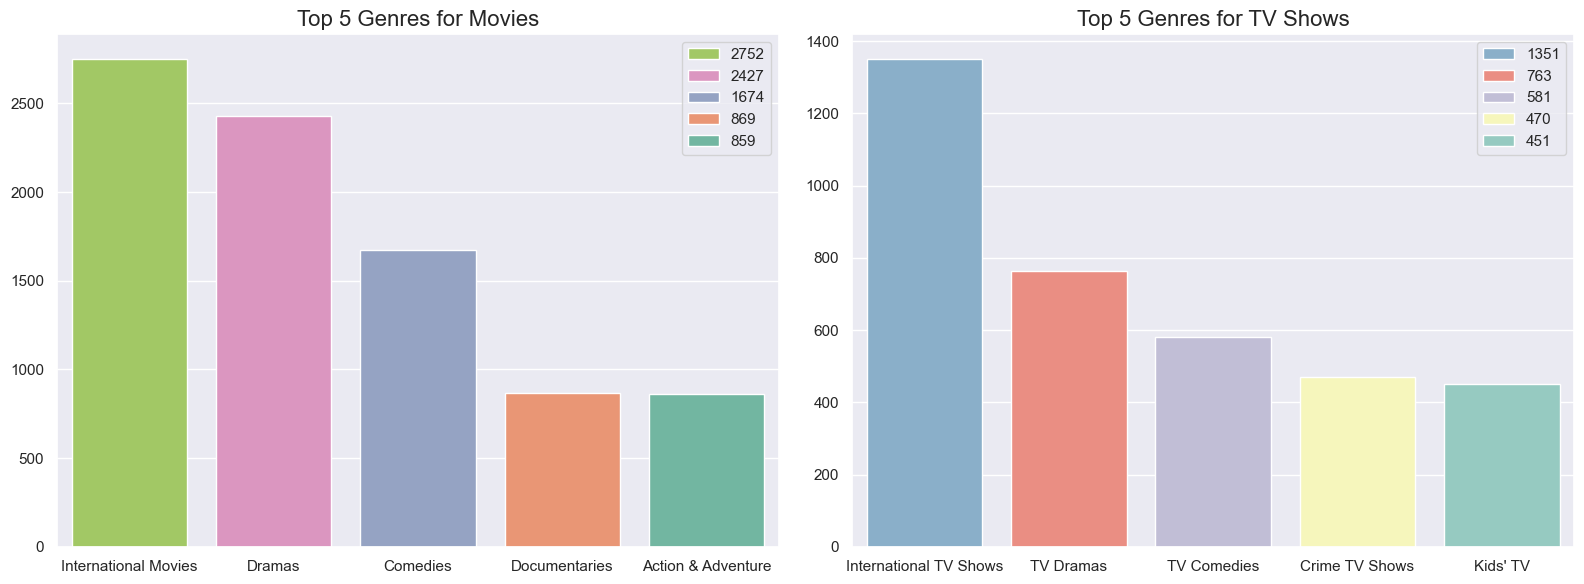

In [20]:
# Visualization for each type separately
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.set_theme(style='darkgrid')

# Top 5 genres for Movies
sns.barplot(x=movies_genres.index, 
            y=movies_genres.values, 
            palette='Set2', 
            hue=movies_genres.values, 
            ax=axes[0])
axes[0].set_title('Top 5 Genres for Movies', fontsize=16)
axes[0].set_xlabel('')
axes[0].legend(reverse=True)

# Top 5 genres for Movies
sns.barplot(x=tv_show_genres.index, 
            y=tv_show_genres.values, 
            palette='Set3', 
            hue=tv_show_genres.values, 
            ax=axes[1])
axes[1].set_title('Top 5 Genres for TV Shows', fontsize=16)
axes[1].set_xlabel('')
axes[1].legend(reverse=True)

plt.tight_layout()
plt.show()

**Which countries produce the most content?**

In [7]:
# Split multiple countries in 'country' and remove extra spaces
df['country']= df['country'].str.split(',')
df['country'] = df['country'].apply(lambda x: [i.strip() for i in x])

# Split the 'country' column to handle multiple countries per entry
df_exploded = df.explode('country')

# Count the number of occurrences for each country
country_counts =df_exploded.groupby('country').size()

# Remove 'Unknown' from the country counts
filtered_country_counts=country_counts[country_counts.index!='Unknown']

# Get the top 10 countries
top_countries= filtered_country_counts.nlargest(10)
top_countries

country
United States     3690
India             1046
United Kingdom     806
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
dtype: int64

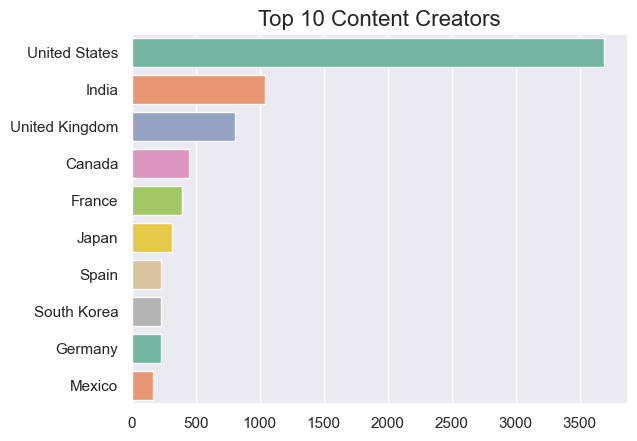

In [17]:
# Visualization of the top 10 contries
sns.set_theme(style='darkgrid')
sns.barplot(x=top_countries.values, 
            y=top_countries.index, 
            palette='Set2', 
            hue=top_countries.index)
plt.ylabel('')
plt.title('Top 10 Сontent Сreators', fontsize=16)
plt.show()

**Who are the top 10 directors with the most releases?**

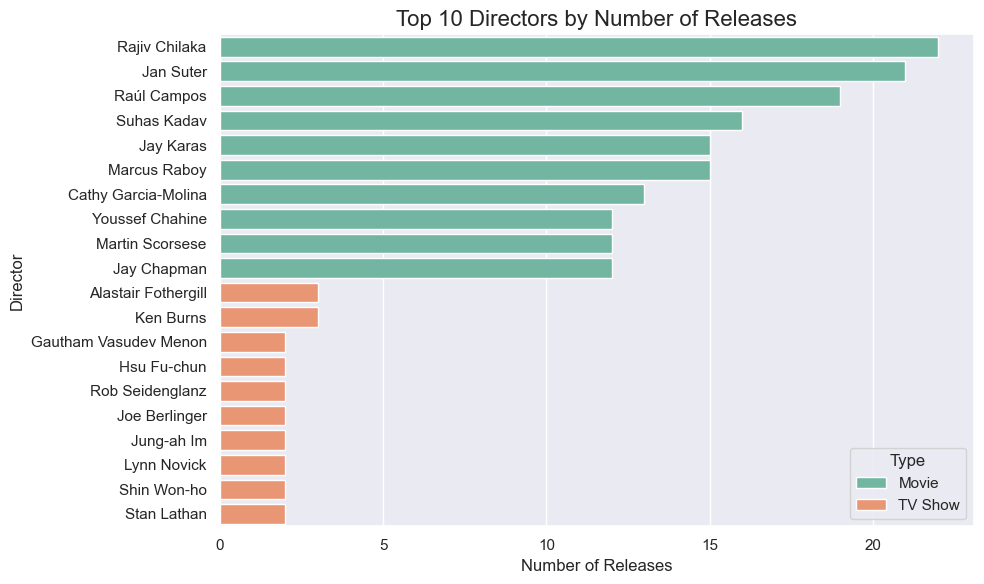

In [15]:

# Separate data into movies and TV shows
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

# Function to get top-5 directors
def get_top_directors(data):
    all_directors = data['director'].str.split(',').explode().str.strip()
    all_directors = all_directors[all_directors != 'Unknown']
    return Counter(all_directors).most_common(10)

top_movie_directors = get_top_directors(movies)
top_tv_show_directors = get_top_directors(tv_shows)

# Create DataFrames for movies and TV shows
top_movie_directors_df = pd.DataFrame(top_movie_directors, columns=['Director', 'Count'])
top_movie_directors_df['Type'] = 'Movie'

top_tv_show_directors_df = pd.DataFrame(top_tv_show_directors, columns=['Director', 'Count'])
top_tv_show_directors_df['Type'] = 'TV Show'

# Combine data for plotting
combined_df = pd.concat([top_movie_directors_df, top_tv_show_directors_df])

# Plot the results
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10, 6))
sns.barplot(
    x='Count', 
    y='Director', 
    hue='Type', 
    data=combined_df, 
    palette='Set2'
)
plt.title('Top 10 Directors by Number of Releases', fontsize=16)
plt.xlabel('Number of Releases')
plt.ylabel('Director')
plt.tight_layout()
plt.show()



**What is the distribution by ratings?**

In [10]:
# Dictionary with rating explanations for the legend
rating_explanations = {
    'TV-MA': 'Mature Audience Only',
    'TV-14': 'Parents Strongly Cautioned',
    'TV-PG': 'Parental Guidance Suggested',
    'R': 'Restricted',
    'PG-13': 'Parents Strongly Cautioned (13+)',
    'TV-Y7': 'Directed to Older Children',
    'TV-Y': 'All Children',
    'PG': 'Parental Guidance Suggested',
    'TV-G': 'General Audience',
    'NR': 'Not Rated',
    'G': 'General Audience (All Ages)',
    'TV-Y7-FV': 'Older Children (Fantasy Violence)',
    'NC-17': 'Adults Only',
    'UR': 'Unrated'
}

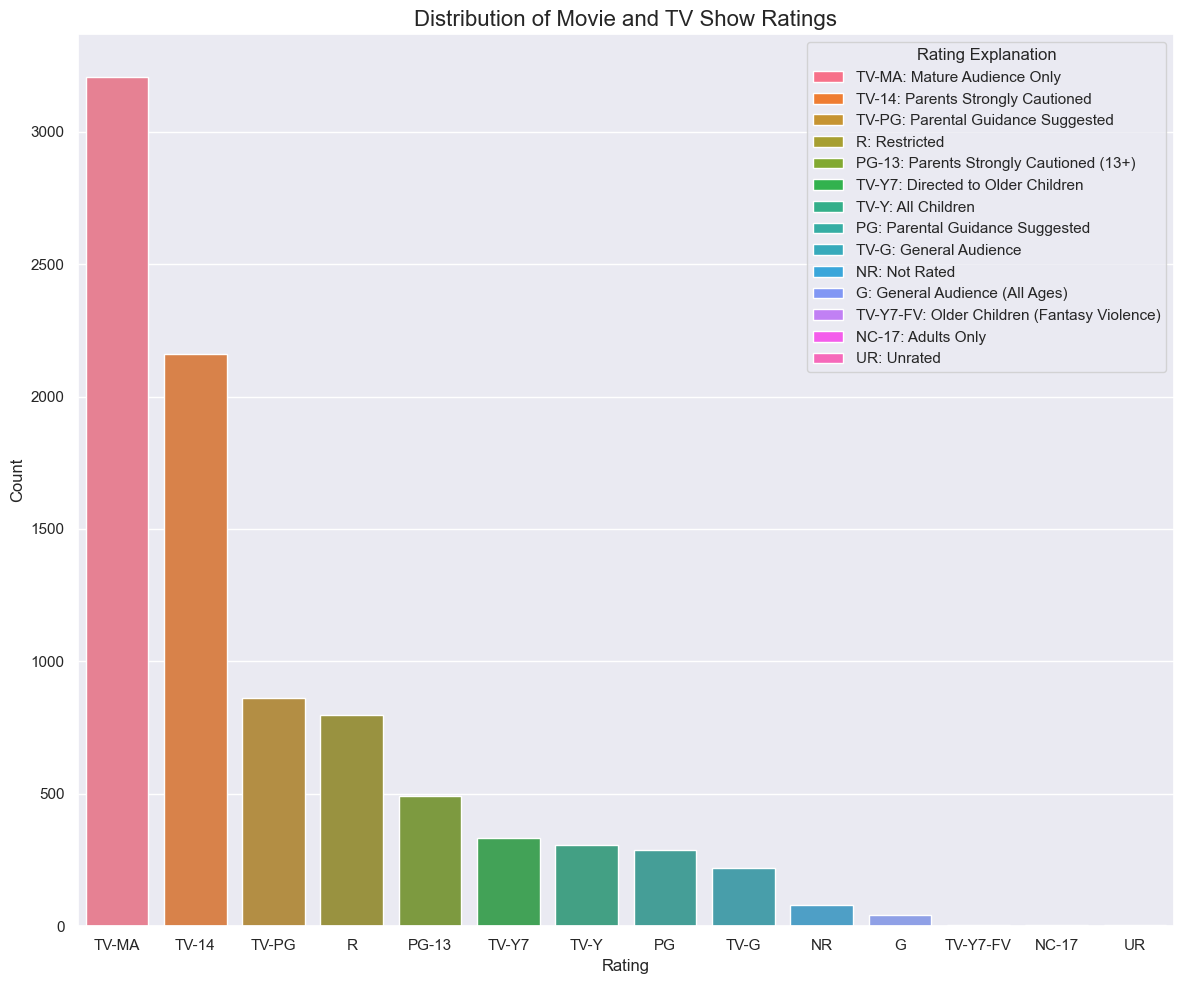

In [16]:
# Visualization of the distribution of ratings
rating_filtered = df[df['rating'] != 'Unknown'] # Remove 'Unknown' from the plot
rating_order = rating_filtered['rating'].value_counts().index[:15]
palette = dict(zip(rating_order, sns.color_palette('husl', n_colors=len(rating_order))))


plt.figure(figsize=(12, 10))
sns.set_theme(style='darkgrid')
ax = sns.countplot(
    x='rating',
    hue='rating',
    data=rating_filtered,
    palette=palette,  
    order=rating_order
)

# Create legend with rating explanations
legend_elements = [
    Patch(facecolor=palette[rating], label=f"{rating}: {rating_explanations.get(rating, 'No explanation')}")
    for rating in rating_order
]
plt.legend(
    handles=legend_elements,
    title='Rating Explanation',
    bbox_to_anchor=(1, 1),
    loc='upper right'
)

plt.title('Distribution of Movie and TV Show Ratings', fontsize=16)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

**How many TV Series and Movies are released each year?**

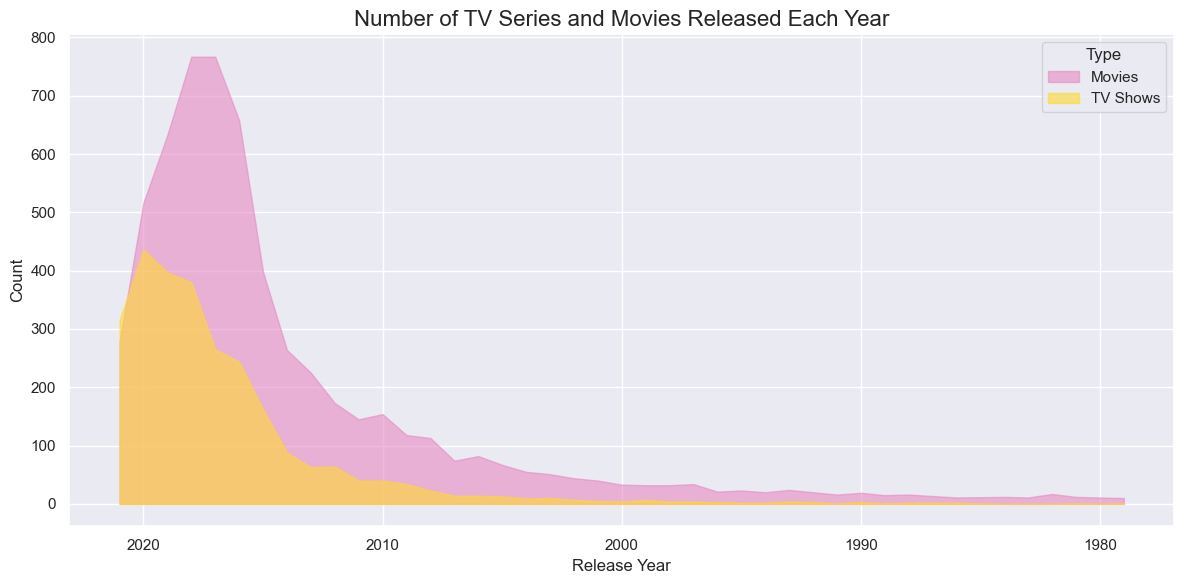

In [23]:
# Group data by release_year and type (Movie/TV Show)
release_by_type = df.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Filter years with more than 10 releases
filtered_release_by_type = release_by_type[(release_by_type['Movie'] + release_by_type['TV Show']) > 10]

# Plot the result
palette = sns.color_palette('Set2', n_colors=6)
plt.figure(figsize=(12, 6))
plt.fill_between(filtered_release_by_type.index,
                 filtered_release_by_type['Movie'],
                 alpha=0.6,
                 label='Movies',
                 color=palette[3])
plt.fill_between(filtered_release_by_type.index,
                 filtered_release_by_type['TV Show'],
                 alpha=0.6,
                 label='TV Shows',
                 color=palette[5])

plt.title('Number of TV Series and Movies Released Each Year', fontsize=16)
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.legend(title='Type')
plt.gca().invert_xaxis()
plt.tight_layout()
plt.show()



**What are the most popular words in descriptions?**

In [ ]:
# Load stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to tokenize text
def tokenize(text):
    words = re.findall(r'\b\w+\b', str(text).lower())
    words = [word for word in words if word not in stop_words]
    return words

# Analyze common words for each genre
result_data = []
for genre in all_genres.index:
    genre_descriptions = df[df['listed_in'].apply(lambda x: genre in x if isinstance(x, list) else False)]['description']
    words = [word for desc in genre_descriptions.dropna() for word in tokenize(desc)]
    word_count = Counter(words)
    for word, count in word_count.items():
        result_data.append([genre, word, count])

# Create DataFrame with results and sort
result_df = pd.DataFrame(result_data, columns=['Genre', 'Word', 'Frequency'])
result_df = result_df.sort_values(by=['Genre', 'Frequency'], ascending=[True, False])

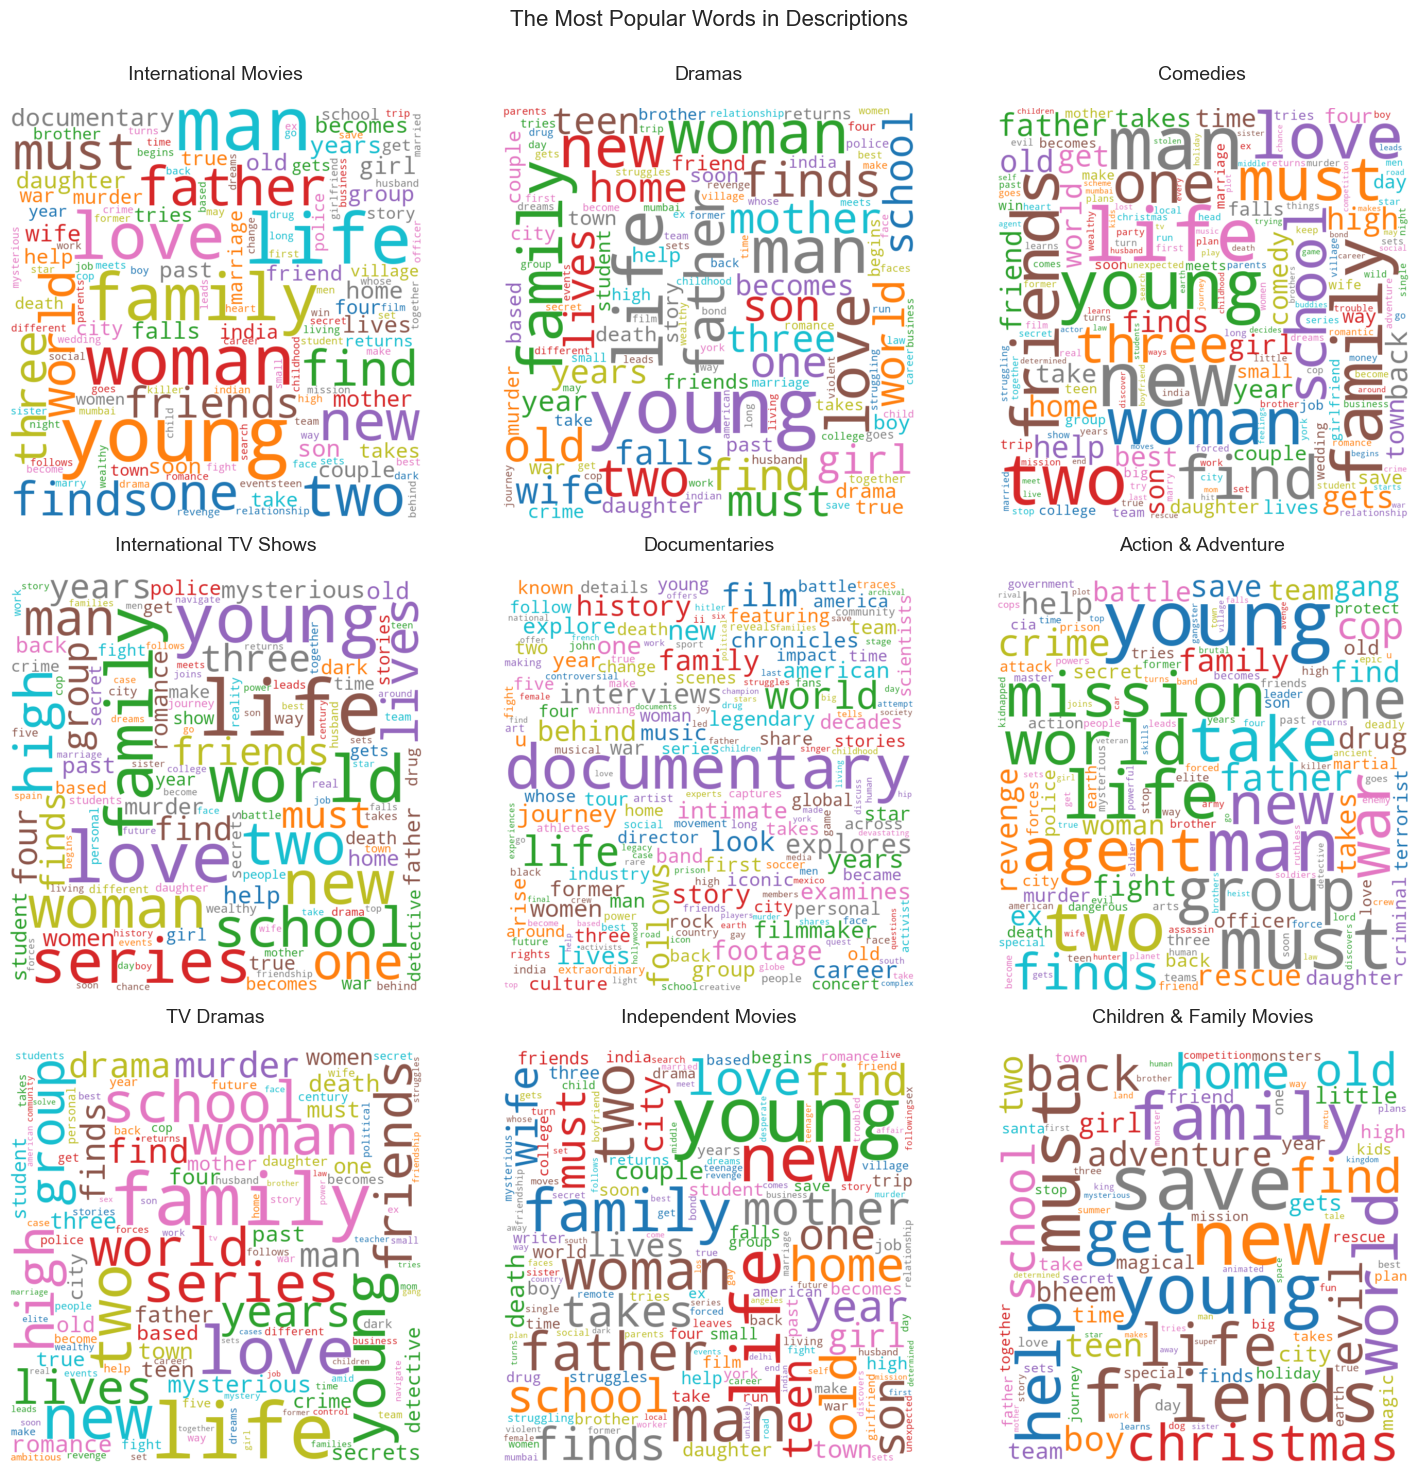

In [31]:
# Visualization of word clouds for the top 9 genres
top_genres = all_genres.head(9).index

# Set up a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

# Create word clouds for each genre
for ax, genre in zip(axes, top_genres):
    filtered_data = result_df[result_df['Genre'] == genre]
    word_freq = {row['Word']: row['Frequency'] for _, row in filtered_data.iterrows()}
    wordcloud = WordCloud(
        width=800, height=800, 
        background_color='white',
        colormap='tab10',
        max_font_size=150,
        min_font_size=15
    ).generate_from_frequencies(word_freq)

    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    ax.set_title(genre, fontsize=14, pad=20)

# Set the overall title
fig.suptitle('The Most Popular Words in Descriptions', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98]) 
plt.show()